In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df=pd.read_csv("C:\\Users\\USER-11\\Downloads\\student-por.csv")

In [5]:
df.shape

(649, 33)

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df . dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [9]:
df.info 

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel fre

In [10]:
corr = df['G2'].corr(df['G3'])
print(corr)

0.9185480035603513


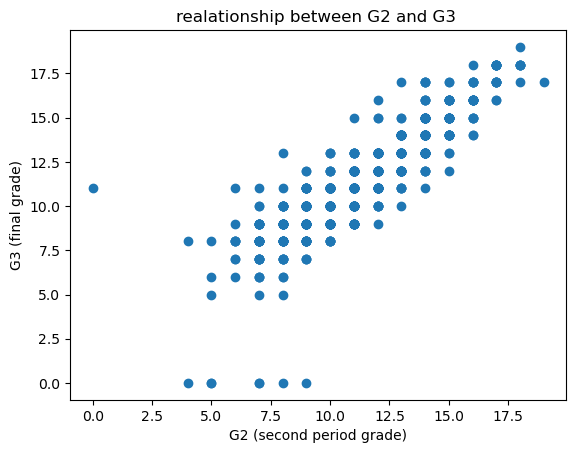

In [11]:
plt.scatter(df['G1'],(df['G2']))
plt.title('realationship between G2 and G3 ')
plt.xlabel('G2 (second period grade)')
plt.ylabel('G3 (final grade)')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn .impute import SimpleImputer
from sklearn .metrics import r2_score,accuracy_score

In [13]:
x = df.drop(['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','famrel','freetime','freetime','goout','Dalc','Walc','health','absences','G1','G2'],axis=1)
y = df['G3']

In [14]:
numerical_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()

In [15]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [16]:
numerical_transformer = Pipeline(steps=[
                            ('imputer',SimpleImputer(strategy='mean')),
                             ('scaler',StandardScaler())
])

In [17]:
categorical_transformer=Pipeline(steps=[
                                 ('imputer',SimpleImputer(strategy='most_frequent')),
                                ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(transformers=[
                                ('num',numerical_transformer,numerical_cols),
                                 ('cat',categorical_transformer,categorical_cols)
])

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model_1 = Pipeline(steps=[
                    ('pre',preprocessor),('reg',LinearRegression())
])

In [22]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['traveltime', 'studytime',
                                                   'failures', 'G3']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('reg', LinearRegression())])

In [23]:
prediction_1 = model_1.predict(X_test)


print(f'Accuracy:{r2_score(y_test,prediction_1)*100:.2f}')

Accuracy:100.00


In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model_2 = Pipeline(steps=[
                   ('pre',preprocessor),('reg',DecisionTreeRegressor(max_depth=5,random_state=42))
])

In [26]:
model_2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['traveltime', 'studytime',
                                                   'failures', 'G3']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('reg', DecisionTreeRegressor(max_depth=5, random_state=42))])

In [27]:
prediction_2 = model_2.predict(X_test)


print(f'Accuracy:{r2_score(y_test,prediction_2)*100:.2f}')

Accuracy:100.00


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model_3=Pipeline(steps=[
                 ('pre',preprocessor),('reg',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [30]:
model_3.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['traveltime', 'studytime',
                                                   'failures', 'G3']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('reg', RandomForestRegressor(random_state=42))])

In [31]:
prediction_3 = model_3.predict(X_test)


print(f'Accuracy:{r2_score(y_test,prediction_3)*100:.2f}')

Accuracy:99.93
